In [79]:
import numpy as np
import pandas as pdzz
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [68]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

## Feature Engineering

In [69]:
cab['Profit'] = cab['Price Charged'] - cab['Cost of Trip']


merged_data = pd.merge(cab, transaction, on='Transaction ID', how='left')
merged_data = pd.merge(merged_data, customer, on='Customer ID', how='left')
merged_data = pd.merge(merged_data, city, on='City', how='left')
merged_data
merged_data.sort_values(by='Date of Travel', ascending=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
1030,10001340,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,52536,Card,Male,24,10606,"418,859","127,001"
489,10000640,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,4844,Cash,Male,32,5548,"1,955,130","164,468"
484,10000635,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,5671,Cash,Male,24,7081,"1,955,130","164,468"
850,10001001,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,2761,Card,Male,40,11462,"8,405,837","302,149"
160,10000171,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,20687,Cash,Male,39,8926,"959,307","69,995"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355489,10435011,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980,10967,Card,Female,63,16390,"1,339,155","17,675"
354114,10433309,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600,8175,Card,Male,24,12571,"1,595,037","144,132"
356365,10435915,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388,45644,Card,Male,28,23014,"545,776","7,044"
359162,10439845,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488,40061,Cash,Male,25,3068,"631,442","5,712"


In [70]:
merged_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [71]:
duplicates = merged_data[merged_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

z_scores = np.abs((merged_data['Profit'] - merged_data['Profit'].mean()) / merged_data['Profit'].std())
outliers_z = merged_data[z_scores > 3]
print("Number of outliers using Z-score:", outliers_z.shape[0])

filtered_data = merged_data[np.abs(z_scores) <= 3]
filtered_data

Number of duplicate rows: 0
Number of outliers using Z-score: 7244


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card,Male,32,6423,"418,859","127,001"


## Analysis

In [72]:
# Base date for Excel (0th day)
base_date = datetime(1900, 1, 1)

# Function to convert Excel serial date to 'yyyymmdd' format
def convert_excel_date(excel_date_number):
    actual_date = base_date + timedelta(days=excel_date_number - 2)  # Adjust for Excel leap year bug
    return actual_date.strftime('%Y%m%d')

# Apply this function to your DataFrame
filtered_data['Date of Travel'] = filtered_data['Date of Travel'].apply(convert_excel_date)
filtered_data.sort_values(by='Date of Travel', ascending=True)

/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/3184460009.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date of Travel'] = filtered_data['Date of Travel'].apply(convert_excel_date)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
909,10001219,20160102,Yellow Cab,SEATTLE WA,29.90,871.63,419.7960,451.8340,37298,Cash,Male,49,22669,"671,238","25,063"
858,10001009,20160102,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,597.3200,21481,Card,Male,28,18030,"943,999","6,133"
449,10000600,20160102,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,194.9500,3363,Cash,Male,31,23320,"1,955,130","164,468"
863,10001014,20160102,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,518.2200,47687,Card,Male,25,16088,"545,776","7,044"
441,10000592,20160102,Yellow Cab,CHICAGO IL,9.63,240.10,127.1160,112.9840,4535,Card,Male,39,19199,"1,955,130","164,468"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356145,10435687,20181231,Yellow Cab,NEW YORK NY,39.90,1047.32,517.1040,530.2160,2033,Cash,Male,20,23992,"8,405,837","302,149"
354791,10434288,20181231,Yellow Cab,BOSTON MA,2.26,31.37,28.2048,3.1652,59187,Cash,Female,52,13751,"248,968","80,021"
356126,10435668,20181231,Yellow Cab,NEW YORK NY,10.45,274.30,146.7180,127.5820,2721,Cash,Male,19,20082,"8,405,837","302,149"
358566,10438908,20181231,Yellow Cab,NEW YORK NY,32.98,676.44,451.1664,225.2736,23,Cash,Female,28,19783,"8,405,837","302,149"


/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/1346077847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date of Travel'] = pd.to_datetime(filtered_data['Date of Travel'], format='%Y%m%d')
/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/1346077847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Profit'] = filtered_data['Price Charged'] - filtered_data['Cost of Trip']
/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/134

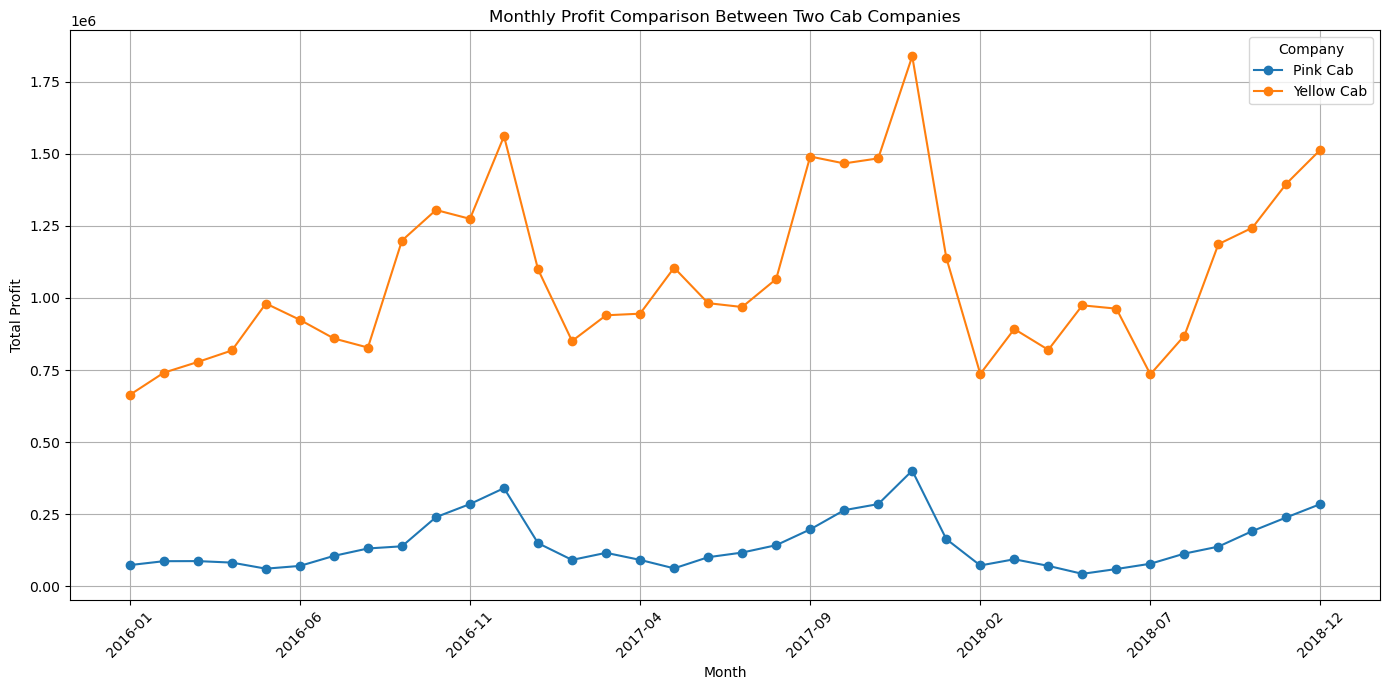

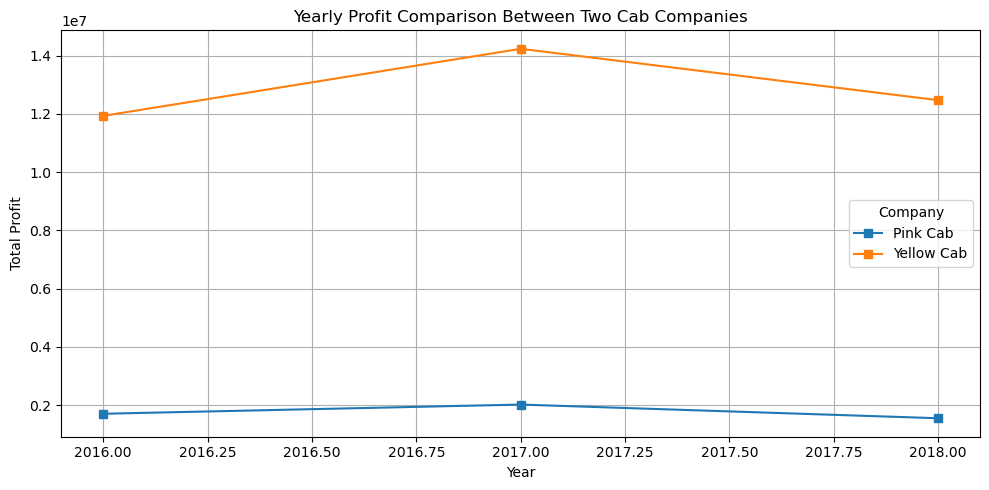

In [73]:
filtered_data['Date of Travel'] = pd.to_datetime(filtered_data['Date of Travel'], format='%Y%m%d')
filtered_data['Profit'] = filtered_data['Price Charged'] - filtered_data['Cost of Trip']

# Add year and month columns for easier aggregation
filtered_data['Year'] = filtered_data['Date of Travel'].dt.year
filtered_data['Month'] = filtered_data['Date of Travel'].dt.strftime('%Y-%m')  # Year-Month format

# Monthly profits
monthly_profits = filtered_data.groupby(['Month', 'Company'])['Profit'].sum().unstack()
# Yearly profits
yearly_profits = filtered_data.groupby(['Year', 'Company'])['Profit'].sum().unstack()

# Plot monthly profits
plt.figure(figsize=(14, 7))
monthly_profits.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Profit Comparison Between Two Cab Companies')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.legend(title='Company')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()
plt.show()

# Plot yearly profits
plt.figure(figsize=(10, 5))
yearly_profits.plot(kind='line', marker='s', ax=plt.gca())
plt.title('Yearly Profit Comparison Between Two Cab Companies')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

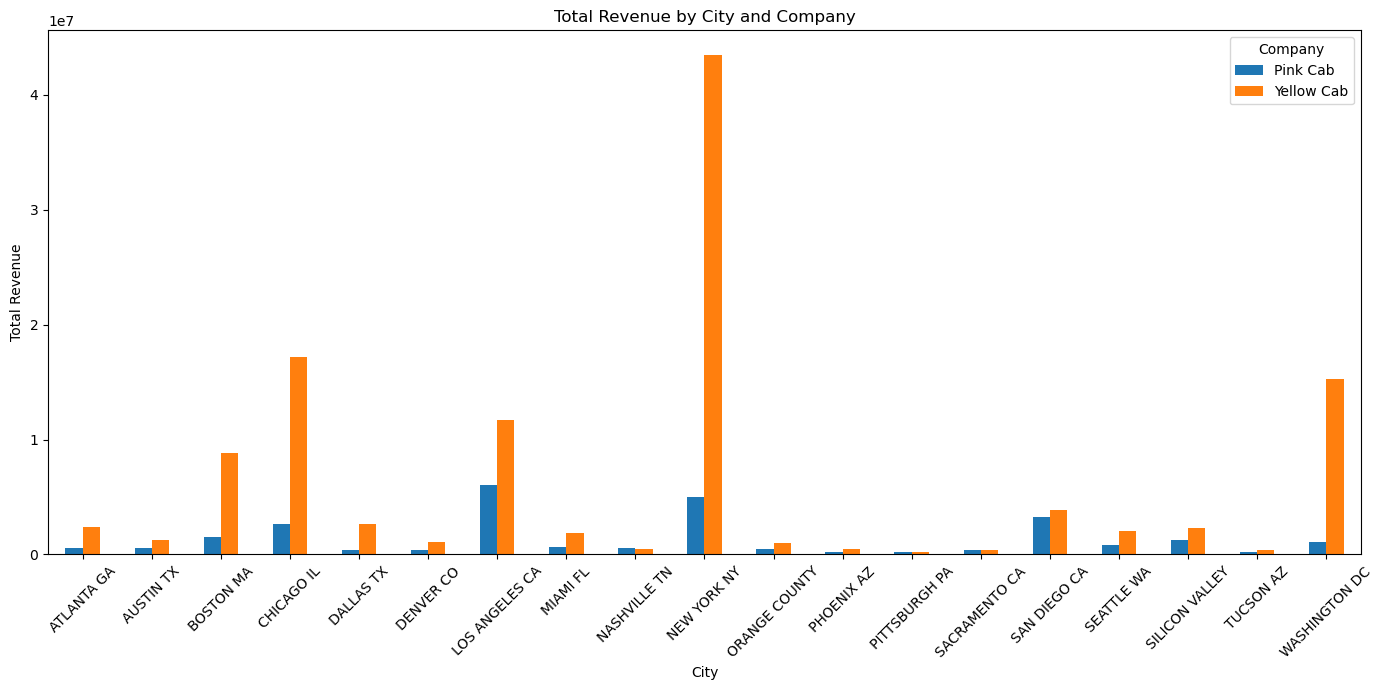

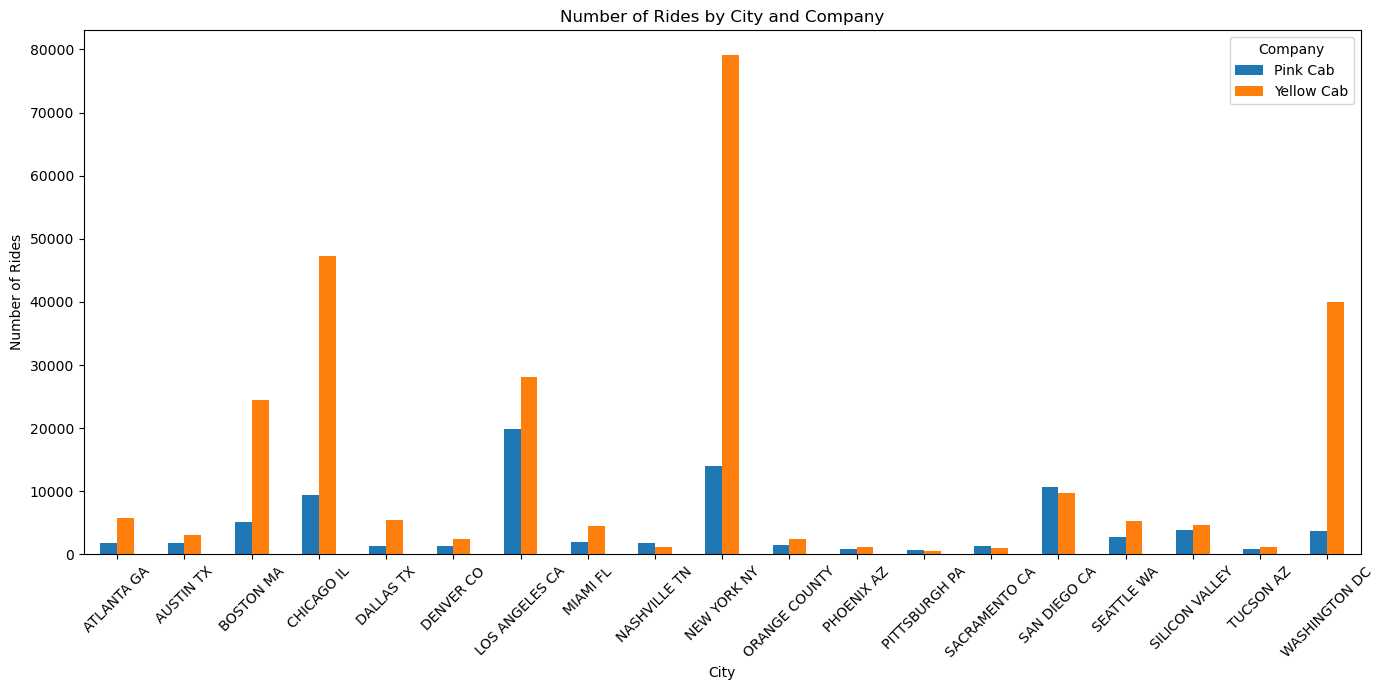

In [76]:
# Let's calculate the total revenue and number of rides by city and company
city_revenue = filtered_data.groupby(['City', 'Company'])['Price Charged'].sum().unstack()
city_rides = filtered_data.groupby(['City', 'Company']).size().unstack()

# Calculate total market shares
total_revenue = filtered_data.groupby('Company')['Price Charged'].sum()
total_rides = filtered_data.groupby('Company').size()

# Plot total revenue by city for each company
plt.figure(figsize=(14, 7))
city_revenue.plot(kind='bar', ax=plt.gca())
plt.title('Total Revenue by City and Company')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.tight_layout()
plt.show()

# Plot number of rides by city for each company
plt.figure(figsize=(14, 7))
city_rides.plot(kind='bar', ax=plt.gca())
plt.title('Number of Rides by City and Company')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.tight_layout()
plt.show()

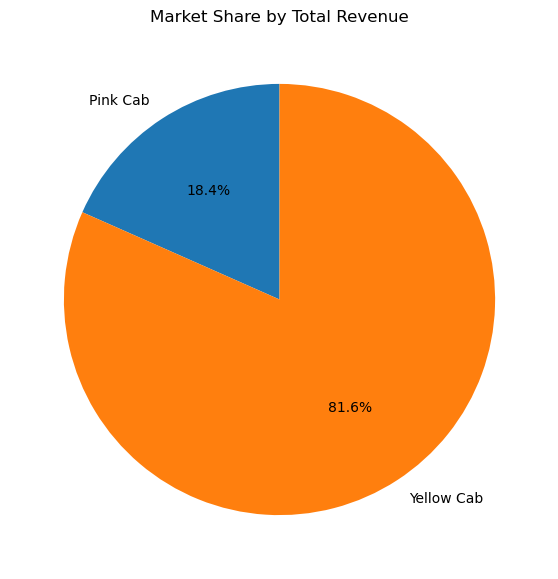

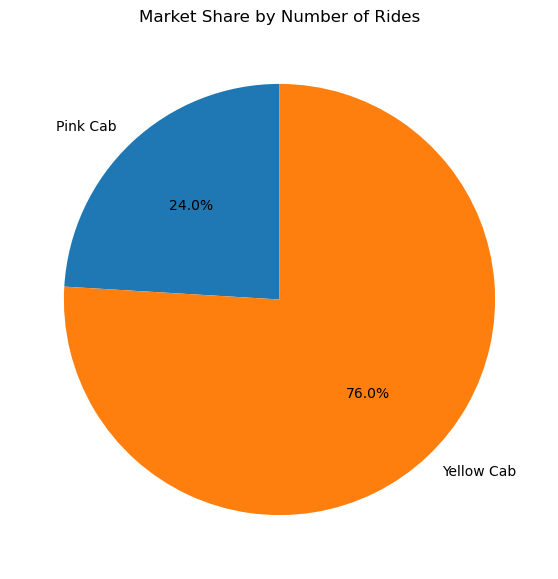

In [77]:
# Plot pie chart for total revenue market share
plt.figure(figsize=(7, 7))
total_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Total Revenue')
plt.ylabel('')  # Remove y-label for cleanliness
plt.show()

# Plot pie chart for total rides market share
plt.figure(figsize=(7, 7))
total_rides.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Number of Rides')
plt.ylabel('')  # Remove y-label for cleanliness
plt.show()

/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/1017638342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Profit Margin'] = filtered_data['Profit'] / filtered_data['Cost of Trip']


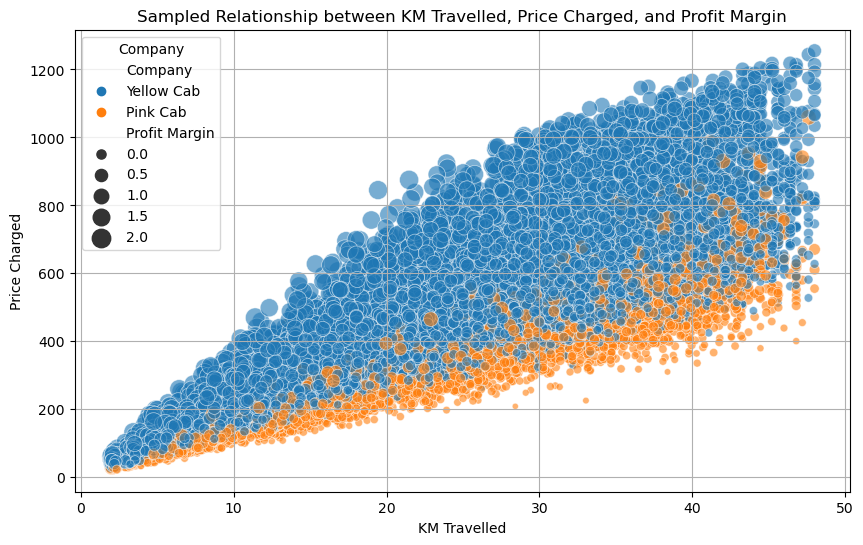

In [86]:
filtered_data['Profit Margin'] = filtered_data['Profit'] / filtered_data['Cost of Trip']

# Sample 5% of the data
sampled_data = filtered_data.sample(frac=0.05)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data, x='KM Travelled', y='Price Charged', 
                size='Profit Margin', hue='Company', alpha=0.6, sizes=(20, 200))
plt.title('Sampled Relationship between KM Travelled, Price Charged, and Profit Margin')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.legend(title='Company')
plt.grid(True)
plt.show()

/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/4084104047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, right=False)


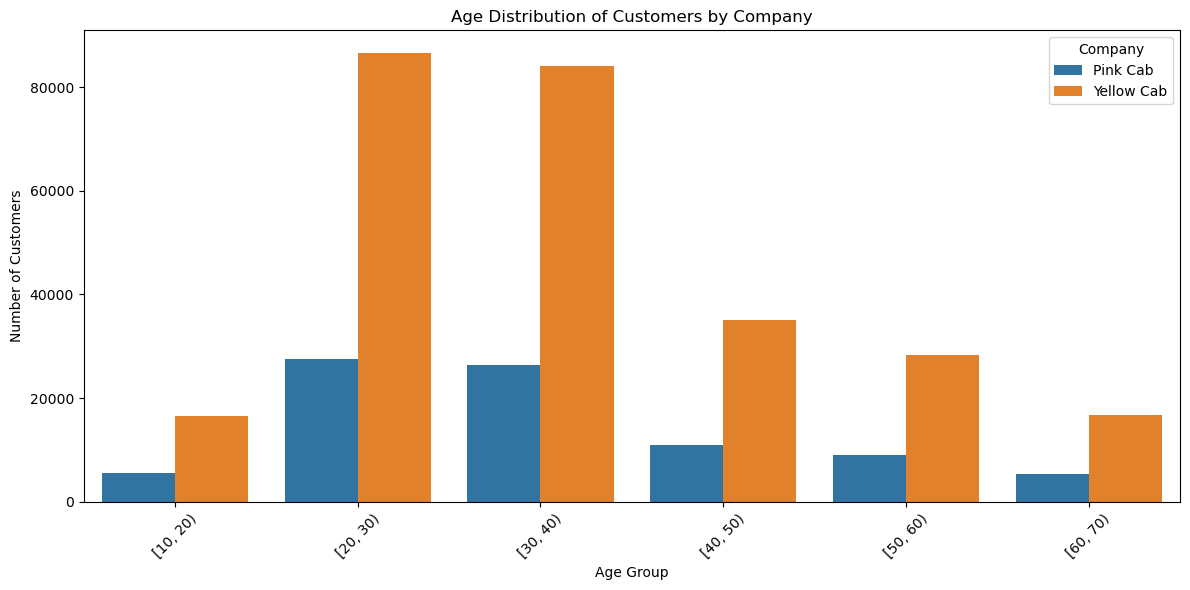

In [93]:
# Define age bins
age_bins = range(10, 80, 10)  # Creating bins from 18 to 75+ in 5-year intervals
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, right=False)

# Plotting age distribution for each company
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Company', data=filtered_data)
plt.title('Age Distribution of Customers by Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.legend(title='Company')
plt.tight_layout()
plt.show()

/var/folders/fl/4plh3t_94k5f41jgzw40y7vm0000gn/T/ipykernel_11667/3315802972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Income Bracket'] = pd.cut(filtered_data['Income (USD/Month)'], bins=income_bins)


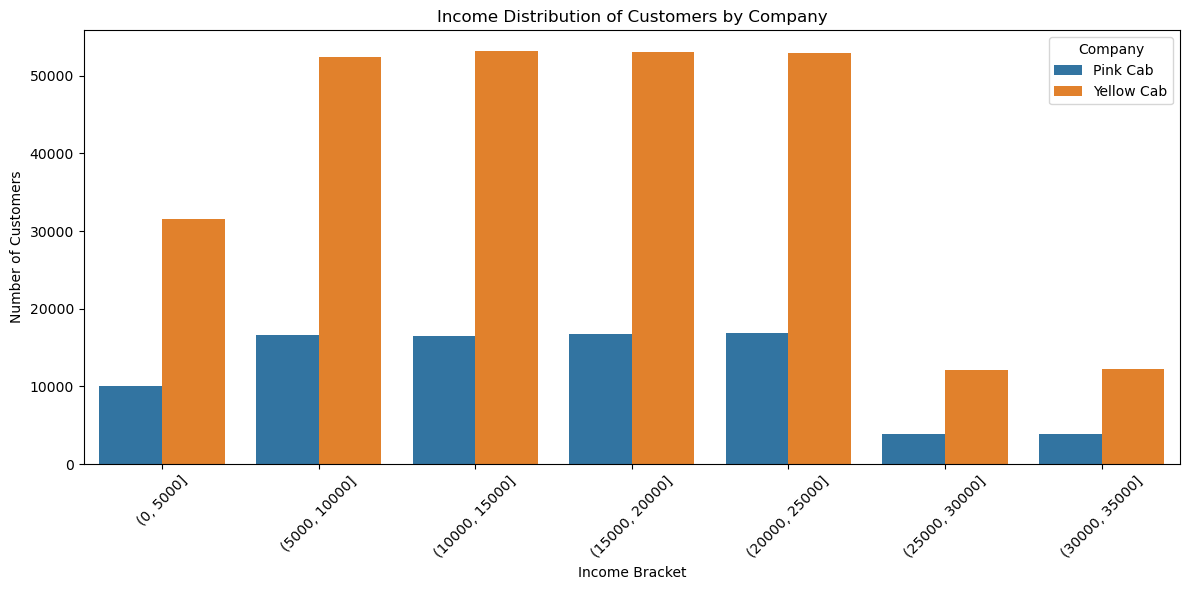

In [97]:
# Define income bins
income_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]  # Define more bins if needed
filtered_data['Income Bracket'] = pd.cut(filtered_data['Income (USD/Month)'], bins=income_bins)

# Plotting income distribution for each company
plt.figure(figsize=(12, 6))
sns.countplot(x='Income Bracket', hue='Company', data=filtered_data)
plt.title('Income Distribution of Customers by Company')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.legend(title='Company')
plt.tight_layout()
plt.show()